In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing import sequence
max_len = 200
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [3]:
x_train.shape

(25000, 200)

In [4]:
y_test.shape

(25000,)

In [5]:
y_train.shape

(25000,)

In [6]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
y_test_one_hot.shape

(25000, 2)

In [9]:
y_test_one_hot[1]

array([0., 1.], dtype=float32)

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [11]:
model = models.Sequential()
# model.add(layers.Embedding(max_features, 64))
model.add(layers.Embedding(max_features, 64, input_length=max_len))
model.add(layers.SimpleRNN(32, activation='tanh', return_sequences=False))
# of parameters = 64*32+32*32+32 = 3104
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 643666 (2.46 MB)
Trainable params: 643666 (2.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history=model.fit(x_train, y_train_one_hot, epochs=10,
                  batch_size=128, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 13s 69ms/step - loss: 0.5838 - accuracy: 0.6767 - val_loss: 0.4170 - val_accuracy: 0.8176
Epoch 2/10
176/176 [==============================] - 12s 67ms/step - loss: 0.3489 - accuracy: 0.8565 - val_loss: 0.3791 - val_accuracy: 0.8368
Epoch 3/10
176/176 [==============================] - 12s 69ms/step - loss: 0.2646 - accuracy: 0.8963 - val_loss: 0.3148 - val_accuracy: 0.8664
Epoch 4/10
176/176 [==============================] - 13s 74ms/step - loss: 0.2021 - accuracy: 0.9248 - val_loss: 0.3165 - val_accuracy: 0.8796
Epoch 5/10
176/176 [==============================] - 12s 67ms/step - loss: 0.1542 - accuracy: 0.9439 - val_loss: 0.3611 - val_accuracy: 0.8752
Epoch 6/10
176/176 [==============================] - 12s 67ms/step - loss: 0.1050 - accuracy: 0.9642 - val_loss: 0.4179 - val_accuracy: 0.8664
Epoch 7/10
176/176 [==============================] - 12s 67ms/step - loss: 0.0671 - accuracy: 0.9787 - val_loss: 0.4392 - val_accuracy:

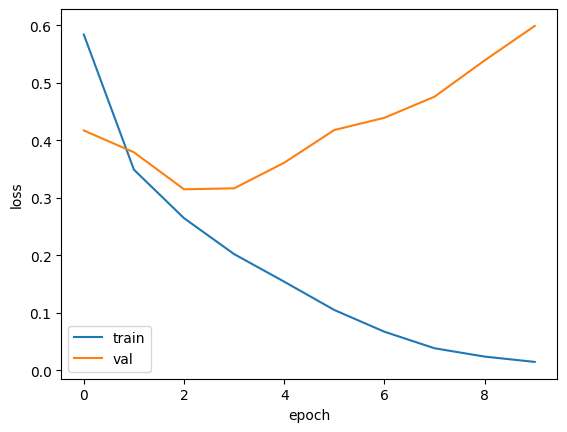

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 9s 12ms/step - loss: 0.6483 - accuracy: 0.8532


In [16]:
print('test_acc:', test_acc)

test_acc: 0.85316002368927


In [17]:
preds = model.predict(x_test)

782/782 [==============================] - 8s 10ms/step


In [18]:
import numpy as np
labels=[0,1]
preds1 = [labels[np.argmax(probs)] for probs in preds]

In [19]:
preds1[0]

0

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds1)

array([[10410,  2090],
       [ 1581, 10919]])

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     12500
           1       0.84      0.87      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

